# Chapter 6. Polarized Spherical Convolution

In [1]:
# from IPython.display import display
# from typing import Sequence
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import polarsh as psh
from utils import plot_text_only
psh.set_visoptions_vispy(title_size = 12, arrow_scale=0.3, help=False)

## 6.1. Polarized Spherical Convolution in the Angular Domain
Recall scalar spherical convolution. Scalar convolution kernels can be understood in the following two perspectives equivalently:

1. A kernel $k\left(\theta\right)\in\mathbb R$ is a fucntion from a single angle $\theta$ to a scalar, which appears in the integral formula of spherical convolution written in Eqs. (M-10, S-70).
2. A kernel $k\left(\hat\omega\right)\in\mathbb R$ is a scalar field which is the output of a rotation equivariant linear operator with the Dirac delta input, i.e., $k = K_{\mathcal F}\left[\delta_{\hat z_g}\right]$.

In scalar spherical convolution, one can intuitively see that these two are equivalent by azimuthal symmetry $k\left(\theta,\phi\right)=k\left(\theta\right)$ the second one.
<!-- so that one may explain the above three definitions in any order, e.g. 2→1→3 or 1→3→2. However polarized spherical convolution is quite tricky. The three definitions are converted as follows: -->
However, when extending definition of spherical convolution to Stokes vector fields, the two perspectives to understand a polarized spherical kernel give quite different formulations.

1. A kernel $\mathbf k\left(\theta\right)$ is a fucntion from a single angle $\theta$ to a $4\times 4$ Mueller matrix, which appears in the integral formula of polarized sphericla convolution as follows:
$$\tag{variant of M-63}
\overset\leftrightarrow k *\overset\leftrightarrow f \left(\hat\omega_o\right) = \int_{\hat{\mathbb S}^2}{\left[\mathbf k\left(\cos^{-1}\hat\omega_i\cdot\hat\omega_o\right) \left[\overset\leftrightarrow f \left(\hat\omega_i\right)\right]^{\vec{\mathbf F}_i}\right]_{\vec{\mathbf F}_o}\mathrm d\hat\omega_i},
$$
where $\vec{\mathbf F}_i$ and $\vec{\mathbf F}_o$ are local frames at $\hat\omega_i$ and $\hat\omega_o$, respectively, such that their $x$ axes are aligned along the common great cirgle of $\hat\omega_i$ and $\hat\omega_o$, i.e.:
$$
\begin{equation}\nonumber
\begin{split}
    \hat y &= \mathrm{normalize}\left(\hat\omega_i\times\hat\omega_o\right), \\
    \hat x_i &= \hat y\times \hat\omega_i, \\
    \hat x_o &= \hat y\times \hat\omega_o, \\
    \vec{\mathbf F}_{i}&=\begin{bmatrix}
        \hat x_i & \hat y & \hat\omega_i
\end{bmatrix}, \\
    \vec{\mathbf F}_{o}&=\begin{bmatrix}
        \hat x_o & \hat y & \hat\omega_i
\end{bmatrix}
\end{split}
\end{equation}
$$
2. A kernel is a combination of the outputs of a rotation equivariant linear operator with the Dirac delta inputs.

In the second perspective, *a combination of the outputs* will be explained later.

In `polarsh`, an instance in `psh.StokesConvKernel` class can be constructed within the first definition of polarzied spherical convolution kernels.
<!-- ----
Convolution operation $g=k*f=K_{\mathcal F}\left[f\right]$:
* The kernel $k\left(\theta\right)$ indicates weights how much $f\left(\hat\omega_i\right)$ contributes on $g\left(\hat\omega_o\right)$, when the angle between $\hat\omega_i$ and $\hat\omega_o$ is $\theta$, i.e., $\cos\theta = \hat\omega_i\cdot\hat\omega_o$
$$
g\left(\hat\omega_o\right) = \int_{\hat{\mathbb S}^2}{k\left(\cos^{-1}\hat\omega_i\cdot\hat\omega_o\right)f\left(\hat\omega_i\right)\mathrm d \hat\omega}
$$
* Since we already know that $k = K_{\mathcal F}\left[\delta_{\hat z_g}\right]$. Note that $f$ can be considered as a linear combination (integral $f=\int_{\hat{\mathbb S}^2}{f\left(\hat\omega\right) \delta_{\hat z_g} \mathrm d }$)
--- -->

In [2]:
def foo(theta, thres, peak):
    return np.where(np.abs(theta)<thres, peak*(1-theta/thres), 0)

def k_func_1(theta): # All compoents are visible
    theta = np.asarray(theta)
    k0 = foo(theta, np.pi*3/4, 0.5)
    kpi = foo(np.pi - theta, np.pi*3/4, 0.5)
    k_s02 = k0 * kpi * 10
    return np.stack([np.stack([k0, k_s02, k_s02*1.1, k0*1.1], -1), 
                     np.stack([k_s02*1.2, k0+1.2*kpi, -1.1*k0+kpi, k_s02*1.3], -1),
                     np.stack([k_s02*1.4, 1.1*k0+kpi, k0-1.2*kpi, k_s02*1.5], -1),
                     np.stack([k0*1.2, k_s02*1.5, k_s02*1.6, k0*1.3], -1)], -1)

k1 = psh.StokesConvKernel(k_func_1)
print(k1, "\n")

theta = [0, np.pi/4, np.pi/2, np.pi]
print(f"For θ={theta},\nk1(θ)=\n{k1(theta)}")

def k_func_2(theta): # Signals are concenterated at the north pole
    Z = np.zeros_like(theta)
    k = foo(theta, 0.3, 20)
    return np.stack([np.stack([k, Z, Z, Z], -1), 
                     np.stack([Z, k, Z, Z], -1),
                     np.stack([Z, Z, k, Z], -1),
                     np.stack([Z, Z, Z, k], -1)], -1)
k2 = psh.StokesConvKernel(k_func_2)

StokesConvKernel[
  cod_type = <CodType.POLAR4: 4>,
  shape_chan = (),
] 

For θ=[0, 0.7853981633974483, 1.5707963267948966, 3.141592653589793],
k1(θ)=
[[[ 0.5         0.          0.          0.6       ]
  [ 0.          0.5         0.55        0.        ]
  [ 0.         -0.55        0.5         0.        ]
  [ 0.55        0.          0.          0.65      ]]

 [[ 0.33333333  0.          0.          0.4       ]
  [ 0.          0.33333333  0.36666667  0.        ]
  [ 0.         -0.36666667  0.33333333  0.        ]
  [ 0.36666667  0.          0.          0.43333333]]

 [[ 0.16666667  0.33333333  0.38888889  0.2       ]
  [ 0.27777778  0.36666667  0.35        0.41666667]
  [ 0.30555556 -0.01666667 -0.03333333  0.44444444]
  [ 0.18333333  0.36111111  0.41666667  0.21666667]]

 [[ 0.          0.          0.          0.        ]
  [ 0.          0.6         0.5         0.        ]
  [ 0.          0.5        -0.6         0.        ]
  [ 0.          0.          0.          0.        ]]]


### Polarized convolution kernel as a combination of spherical functions
For the second perspective to understand polarized kernels, the challenge is that there are multiple Dirac delta Stokes vectors at the north pole $\hat z_g$, depending on each Stokes components (and direction of spin-2 Stokes vector in $\mathcal S_{\hat z_g}$). Here we provide a detailed evaluation for a combination of Stokes vector fields which describe a polarized convolution kernel in the second perspective.

The Stokes component vector of a Stokes vector $\overset\leftrightarrow s = \left[\mathbf s\right]_{\vec{\mathbf F}_g}\in{\mathcal S}_{\hat z_g}$ at the north pole under $\vec{\mathbf F}_{\theta\phi}\left(0,\phi\right) = \vec{\mathbf F}_g\mathbf R_{z}\left(\phi\right)$ is:
$$
\left[\overset\leftrightarrow s\right]^{\vec{\mathbf F}_{\theta\phi}\left(0,\phi\right)} = \begin{bmatrix}
    1&0&0&0 \\ 0&\cos2\phi&\sin2\phi&0 \\ 0&-\sin2\phi&\cos2\phi&0 \\ 0&0&0&1
\end{bmatrix}\mathbf s = \begin{bmatrix}
    s_0 \\ s_1 \cos2\phi + s_2 \sin2\phi \\ -s_1 \sin2\phi + s_2\cos2\phi \\ s_3
\end{bmatrix}.
$$
Thus, the result of convolution operation with Dirac delta input $\overset\leftrightarrow s \delta_{\hat z_g}$ is evaluated as follows:
$$
    K_{\mathcal F}\left[\overset\leftrightarrow s \delta_{\hat z_g}\right]\left(\theta,\phi\right) = \left[\mathbf k\left(\theta\right)\left[\overset\leftrightarrow s\right]^{\vec{\mathbf F}_{\theta\phi}\left(0,\phi\right)}\right]_{\vec{\mathbf F}_{\theta\phi}\left(\theta,\phi\right)} = \left[\mathbf k\left(\theta\right) \begin{bmatrix}
    s_0 \\ s_1 \cos2\phi + s_2 \sin2\phi \\ -s_1 \sin2\phi + s_2\cos2\phi \\ s_3
\end{bmatrix} \right]_{\vec{\mathbf F}_{\theta\phi}\left(\theta,\phi\right)}.
$$

We finally get convolution results with single-Stokes component Dirac delta inputs.
$$
\begin{equation}\nonumber
\begin{split}
    \overset\leftrightarrow k_{s_0\delta}\left(\hat\omega\right) &\coloneqq K_{\mathcal F}\left[\begin{bmatrix}
        1 \\ 0 \\ 0 \\ 0
    \end{bmatrix}_{\vec{\mathbf F}_g}\delta_{\hat z_g}\right]\left(\theta,\phi\right) = \begin{bmatrix}
        k_{00}\left(\theta\right) \\
        k_{10}\left(\theta\right) \\
        k_{20}\left(\theta\right) \\
        k_{30}\left(\theta\right)
    \end{bmatrix}_{\vec{\mathbf F}_{\theta\phi}\left(\theta,\phi\right)}, \\
    
    \overset\leftrightarrow k_{s_1\delta}\left(\hat\omega\right) &\coloneqq K_{\mathcal F}\left[\begin{bmatrix}
        0 \\ 1 \\ 0 \\ 0
    \end{bmatrix}_{\vec{\mathbf F}_g}\delta_{\hat z_g}\right]\left(\theta,\phi\right) = \begin{bmatrix}
        k_{01}\left(\theta\right)\cos2\phi - k_{02}\left(\theta\right)\sin2\phi \\
        k_{11}\left(\theta\right)\cos2\phi - k_{12}\left(\theta\right)\sin2\phi \\
        k_{21}\left(\theta\right)\cos2\phi - k_{22}\left(\theta\right)\sin2\phi \\
        k_{31}\left(\theta\right)\cos2\phi - k_{32}\left(\theta\right)\sin2\phi
    \end{bmatrix}_{\vec{\mathbf F}_{\theta\phi}\left(\theta,\phi\right)}, \\

    \overset\leftrightarrow k_{s_2\delta}\left(\hat\omega\right) &\coloneqq K_{\mathcal F}\left[\begin{bmatrix}
        0 \\ 0 \\ 1 \\ 0
    \end{bmatrix}_{\vec{\mathbf F}_g}\delta_{\hat z_g}\right]\left(\theta,\phi\right) = \begin{bmatrix}
        k_{01}\left(\theta\right)\sin 2\phi + k_{02}\left(\theta\right)\cos2\phi \\
        k_{11}\left(\theta\right)\sin 2\phi + k_{12}\left(\theta\right)\cos2\phi \\
        k_{21}\left(\theta\right)\sin 2\phi + k_{22}\left(\theta\right)\cos2\phi \\
        k_{31}\left(\theta\right)\sin 2\phi + k_{32}\left(\theta\right)\cos2\phi
    \end{bmatrix}_{\vec{\mathbf F}_{\theta\phi}\left(\theta,\phi\right)}, \\

    \overset\leftrightarrow k_{s_3\delta}\left(\hat\omega\right) &\coloneqq K_{\mathcal F}\left[\begin{bmatrix}
        0 \\ 0 \\ 0 \\ 1
    \end{bmatrix}_{\vec{\mathbf F}_g}\delta_{\hat z_g}\right]\left(\theta,\phi\right) = \begin{bmatrix}
        k_{03}\left(\theta\right) \\
        k_{13}\left(\theta\right) \\
        k_{23}\left(\theta\right) \\
        k_{33}\left(\theta\right)
    \end{bmatrix}_{\vec{\mathbf F}_{\theta\phi}\left(\theta,\phi\right)}
\end{split}
\end{equation}
$$

We observe that $\overset\leftrightarrow k_{s_1\delta}$ and $\overset\leftrightarrow k_{s_2\delta}$ consist of the identical information of the kernel $\mathbf k$ since the latter Stokes vector field is simply obtained by rotating the former Stokes vector field by $\frac\pi4$ aroung $\hat z_g$ (i.e., substituting $\phi\leftarrow\phi-\frac\pi4$). This relationship is obvious that $K_{\mathcal F}$ is rotation equivariant and the input Dirac delta Stokes vector fields are obtained by rotating each other.

Thus, we can visualize the kernel into a three (full) Stokes vector fields (or six scalar fields and three spin-2 Stokes vector fields) `k1_on_delta_s0`$\coloneqq \overset\leftrightarrow k_{s_0\delta}$, `k1_on_delta_s1`$\coloneqq \overset\leftrightarrow k_{s_1\delta}$, and `k1_on_delta_s2`$\coloneqq \overset\leftrightarrow k_{s_2\delta}$
#### Visualize `k1`

In [3]:
sphG_cube5 = psh.SphereGridCube(5)
Fg = np.eye(3) # global (world) frame, which also indicate a local frame at the north pole (0, 0, 1).
k1_on_delta_s0 = k1.apply_delta(Fg, [1, 0, 0, 0], sphG_cube5)
k1_on_delta_s1 = k1.apply_delta(Fg, [0, 1, 0, 0], sphG_cube5)
k1_on_delta_s3 = k1.apply_delta(Fg, [0, 0, 0, 1], sphG_cube5)

RFBOutputContext()

CanvasBackend(css_height='900px', css_width='900px')
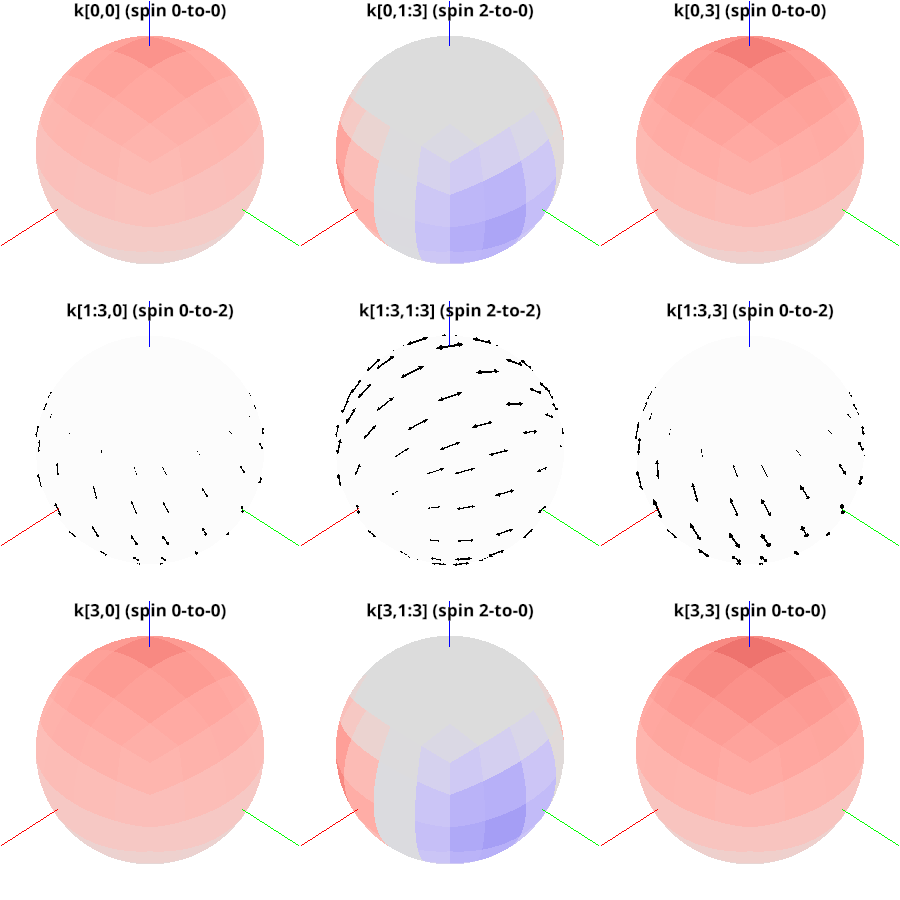

  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\class\.conda\envs\polarsh\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\class\.conda\envs\polarsh\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\class\.conda\envs\polarsh\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start()
  File "c:\Users\class\.conda\envs\polarsh\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start
    self.asyncio_loop.run_forever()
  File "c:\Users\class\.conda\envs\polarsh\Lib\asyncio\base_events.py", line 607, in run_forever
    self._run_once()
  File "c:\Users\class\.conda\envs\polarsh\Lib\asyncio\base_events.py", line 1922, in _run_once
    handle._run()
  File "c:\Users\class\.conda\envs\polarsh\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self

In [4]:
with psh.visualize_layout(3, 3, figsize=(900, 900)):
    k1_on_delta_s0.s0_ScalarField().visualize(title="k[0,0] (spin 0-to-0)")
    k1_on_delta_s1.s0_ScalarField().visualize(title="k[0,1:3] (spin 2-to-0)")
    k1_on_delta_s3.s0_ScalarField().visualize(title="k[0,3] (spin 0-to-0)")

    k1_on_delta_s0.s12_StokesField().visualize(title="k[1:3,0] (spin 0-to-2)")
    k1_on_delta_s1.s12_StokesField().visualize(title="k[1:3,1:3] (spin 2-to-2)")
    k1_on_delta_s3.s12_StokesField().visualize(title="k[1:3,3] (spin 0-to-2)")

    k1_on_delta_s0.s3_ScalarField().visualize(title="k[3,0] (spin 0-to-0)")
    k1_on_delta_s1.s3_ScalarField().visualize(title="k[3,1:3] (spin 2-to-0)")
    k1_on_delta_s3.s3_ScalarField().visualize(title="k[3,3] (spin 0-to-0)")

#### Visualize `k2`

RFBOutputContext()

CanvasBackend(css_height='900px', css_width='900px')
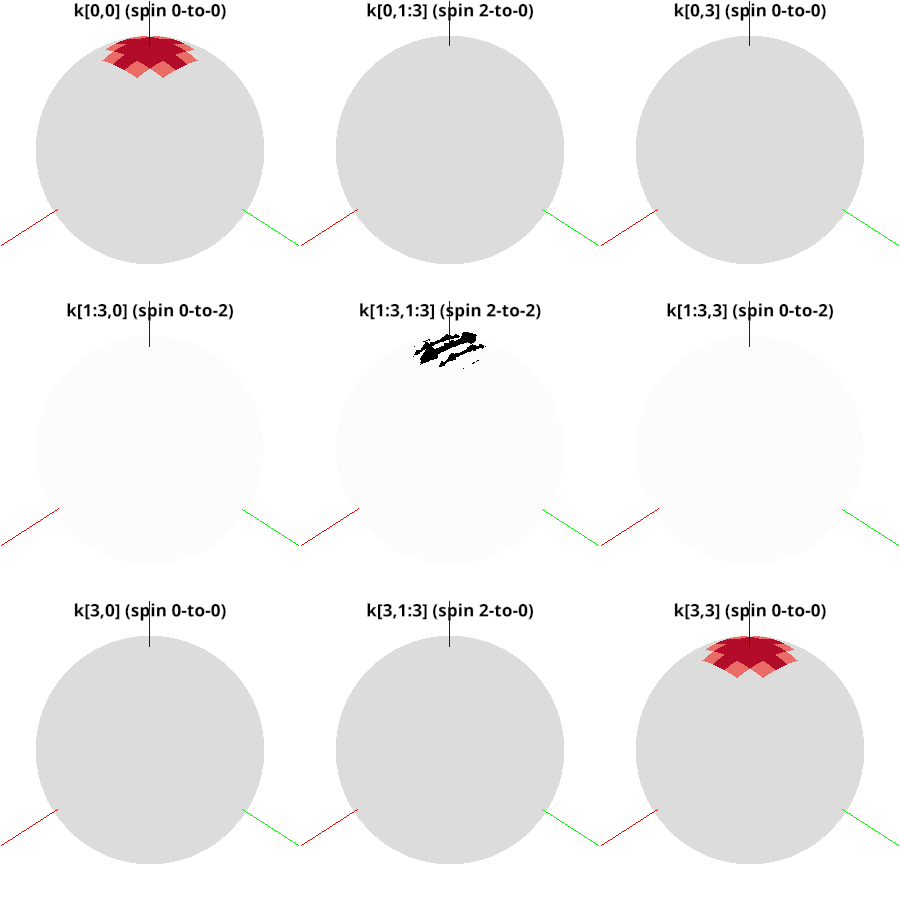

In [5]:
sphG_cube15 = psh.SphereGridCube(15)
k_on_delta_s0 = k2.apply_delta(Fg, [1, 0, 0, 0], sphG_cube15)
k_on_delta_s1 = k2.apply_delta(Fg, [0, 1, 0, 0], sphG_cube15)
k_on_delta_s3 = k2.apply_delta(Fg, [0, 0, 0, 1], sphG_cube15)
with psh.visualize_layout(3, 3, figsize=(900, 900)):
    k_on_delta_s0.s0_ScalarField().visualize(title="k[0,0] (spin 0-to-0)")
    k_on_delta_s1.s0_ScalarField().visualize(title="k[0,1:3] (spin 2-to-0)")
    k_on_delta_s3.s0_ScalarField().visualize(title="k[0,3] (spin 0-to-0)")

    k_on_delta_s0.s12_StokesField().visualize(title="k[1:3,0] (spin 0-to-2)", arrow_scale=0.03)
    k_on_delta_s1.s12_StokesField().visualize(title="k[1:3,1:3] (spin 2-to-2)", arrow_scale=0.03)
    k_on_delta_s3.s12_StokesField().visualize(title="k[1:3,3] (spin 0-to-2)", arrow_scale=0.03)

    k_on_delta_s0.s3_ScalarField().visualize(title="k[3,0] (spin 0-to-0)")
    k_on_delta_s1.s3_ScalarField().visualize(title="k[3,1:3] (spin 2-to-0)")
    k_on_delta_s3.s3_ScalarField().visualize(title="k[3,3] (spin 0-to-0)")

Input data.
For short computation time, we use a low resolution image here.

StokesField[
  dom_type = <DomType.UNI: 0>,
  Stk.shape = [g:6, 15, 15 | c:3, | p:4],
]


RFBOutputContext()

CanvasBackend(css_height='500px')
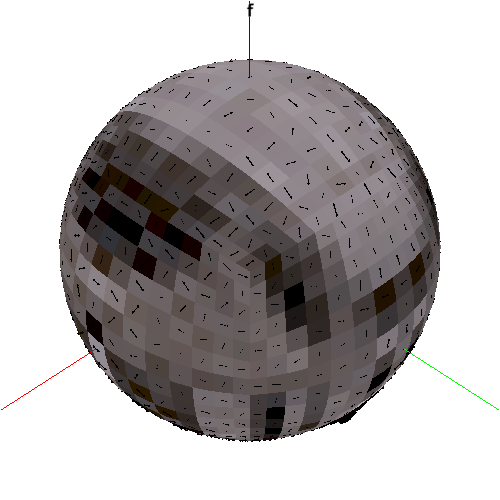

In [6]:
level_conv = 37
shv = psh.SHVec.from_npz_file("input/SHVec_sponza_1024_L100.npz").cut(level_conv)
sphG_cube9 = psh.SphereGridCube(15)
stkF = psh.StokesField.from_SHCoeff(shv, sphG_cube9)
print(stkF)
cfg = dict(arrow_scale=0.05, arrow_gamma=1/2.2)
stkF.visualize(**cfg, title="f")

In [7]:
with psh.Tictoc("Polarized spherical convolution"):
    stkF_conv1 = k1.apply(stkF)
with psh.Tictoc("Polarized spherical convolution"):
    stkF_conv2 = k2.apply(stkF)

Polarized spherical convolution: 8.5385 seconds.
Polarized spherical convolution: 7.6827 seconds.


RFBOutputContext()

CanvasBackend(css_width='600px')
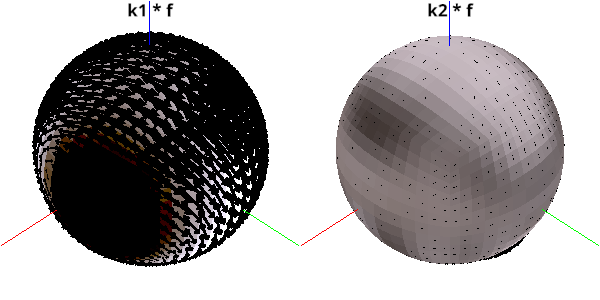

In [8]:
with psh.visualize_layout(1, 2, figsize=(600, 300)):
    stkF_conv1.visualize(**cfg, title="k1 * f")
    stkF_conv2.visualize(**cfg, title="k2 * f")

## 6.2. PSH convolution coefficient
For scalar convolution ([Chapter 2.5. Spherical convolution in the SH domain](./2_spherical_harmonics.ipynb)), the two perspective naturally gives the same convolution coefficients:
$$
\mathrm{k}_{l0} = \underbrace{2\pi\int_0^{\pi}{Y_{l0}\left(\theta,0\right)^* k\left(\theta\right)\mathrm d \theta}}_{\text{Persp. 1: }k\text{ as a function of a single angle}}  = \underbrace{\left\langle Y_{l0}, k \right\rangle_{\mathcal F}}_{\text{Persp. 2: }k\text{ as a scalar field}}.
$$
While the second one would be more intuitive since it is simply reduced to the definition of SH coefficient vectors of scalar fields, the first one is preferable for numerical computation. Understanding PSH convolution coefficients as a PSH coefficient vector, which is already defined in [Chapter 5. Polarized Spherical Harmonics](./5_polarized_spherical_harmonics.ipynb), let's find the PSH coefficient vectors of the Stokes vector fields $\overset\leftrightarrow k_{s_0\delta}$, $\overset\leftrightarrow k_{s_1\delta}$, and $\overset\leftrightarrow k_{s_2\delta}$ first.

> Note for an experimental detail: while the effect of convolution operation looks more intuitive for `k2` than `k1` above, now we investigate PSH coefficients for `k1` since it has more nonzero components.

Compute PSH coeficient vectors of the kernel by considering it as three Stokes vector fields: 63.2718 seconds.


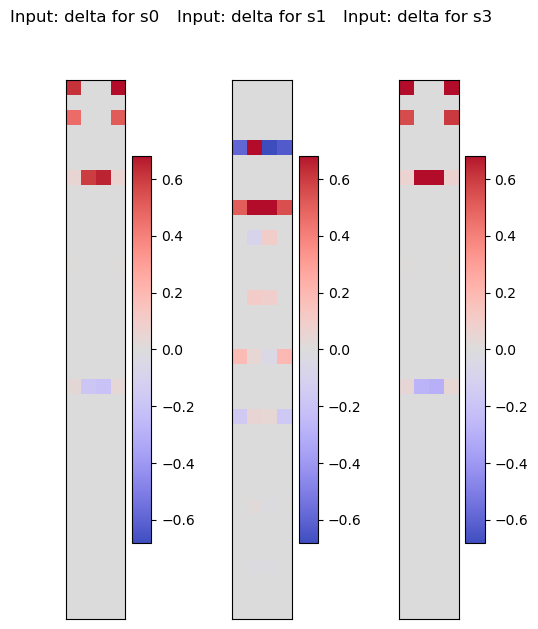

In [9]:
with psh.Tictoc("Compute PSH coeficient vectors of the kernel by considering it as three Stokes vector fields"):
    # ---------- Convert the kernel into Stokes vector fields ----------
    sphG_convcoeff_test = psh.SphereGridCube(512)
    stk_comp_list = [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1]]
    k_stkF_list = [k1.apply_delta(Fg, stk_comp, sphG_convcoeff_test) for stk_comp in stk_comp_list]

    # ---------- Convert Stokes vector fields to PSH coefficient vectors ----------
    level_test = 6
    shv_k_list = [k_stkF.SHCoeff(level_test) for k_stkF in k_stkF_list]

# ---------- visualize ----------
label_list = ['s0', 's1', 's3']
figs = plt.figure(figsize=(5, 7)).subfigures(1, len(shv_k_list))
norm = mcolors.CenteredNorm()
for fig, shv_k, label in zip(figs, shv_k_list, label_list):
    shv_k.matshow(level_show=6, title=f"Input: delta for {label}", fig=fig, norm=norm)

Conversion from a convolution kernel its PSH convolution coefficient can be simply done by `psh.StokesConvKernel.SHCoeff()`. This function is more related to the first perspective. We denote the instance returned by this method by $\mathrm{k}_{l,p_op_i}$ for $p_o,p_i=0,1,2,3$.

In [10]:
with psh.Tictoc("Polarized convolution kernel to PSH convolution coefficients"):
    shConv = k1.SHCoeff(level_conv, n_sample=1024) # Same as `psh.ScalarConvKernel.SHCoeff()`, if `n_samples` is not given that is will be set to a sufficiently large value.
shConv_test = shConv.cut(level_test)

assert isinstance(shConv_test, psh.SHConv)
print(shConv_test)

Polarized convolution kernel to PSH convolution coefficients: 0.1638 seconds.
SHConv[c:  | L: 6 | p: 4, 4][
  level = 6,
  cod_type = <CodType.POLAR4: 4>,
  weighted = False,
  s2s[6, 2, 2] float64,
  s2v[6, 2] complex128,
  v2s[6, 2] complex128,
  v2va[6,] complex128,
  v2vb[6,] complex128,
]


Now we will investigate the relationship between $\mathrm{k}_{l,p_op_i}$, which is implemented in `psh.StokesConvKernel.SHCoeff()` based in the first perspective, and the three PSH coefficients vectors of $\overset\leftrightarrow k_{s_0\delta}$, $\overset\leftrightarrow k_{s_1\delta}$, and $\overset\leftrightarrow k_{s_2\delta}$, respectively, which are based on the second perspective.
### Spin 0-to-0 convolution coefficients
The spin 0-to-0 part is exactly same as conventional scalar spherical convolution.
$$
\tilde {\mathrm k}_{l,p_op_i} = \left\langle Y_{l0}, \overset\leftrightarrow k_{s_{p_i}\delta}\left[p_o\right] \right\rangle_{\mathcal F}  \text{, where }p_i,p_o = 0 \text{ or } 3.
$$
Here, $\overset\leftrightarrow f\left[0\right]$ and $\overset\leftrightarrow f\left[3\right]$ for any (full) Stokes vector field $\overset\leftrightarrow f$ denote the Scalar fields of $s_0$ and $s_3$ components of $\overset\leftrightarrow f$, respectively.

In [13]:
l, m = psh.level2lms(level_test, "UNI", unstack=True)
for i, shv_k in enumerate(shv_k_list[::2]):
    to_be_zero = shv_k.coeff[..., m != 0, ::3]
    assert np.allclose(to_be_zero, 0, atol=1e-5)

    LHS = shConv_test.coeff_s2s()[..., i]
    RHS = shv_k.coeff[..., m==0, ::3]
    assert np.allclose(LHS, RHS, atol=1e-5)

### Spin 2-to-0 convolution coefficients
Observing the fact that they only consists of a subset of $Y_{l,-2}^C$ and $Y_{l2}^C$ is easy.

In [14]:
shv_k = shv_k_list[1]

to_be_zero = shv_k.coeff[..., (m != -2) & (m != 2), ::3]
assert np.allclose(to_be_zero, 0)

However, should we use both $m=-2$ and $m=2$? Which of $k_{01}\left(\theta\right)$ and $k_{02}\left(\theta\right)$ contribute to which of $m=-2$ and $m=2$? Unfortunately, the spin 2-to-0 part is quite tricky. In this case the two perspectives yield slightly different values. In the first perspective:
$$
\begin{align}\tag{variant of S-158}
    \tilde {\mathrm k}_{l,0\mathbf p} \coloneqq& 2\pi\int_0^\pi{ Y_{l,-2}^{C,*}\left(\theta,0\right)\left(k_{01}\left(\theta\right)+i k_{02}\left(\theta\right)\right) \sin\theta\mathrm d\theta},    \quad (\mathtt{shConv.coeff_v2s()}) \\
    =& \int_{\hat{\mathcal S}^2} {Y_{l,-2}^{C,*}\left(\hat\omega\right)  \left(k_{01}\left(\theta\right)+i k_{02}\left(\theta\right)\right)e^{-2i\phi} \mathrm d \hat\omega}. \tag{variant of M-68b}
\end{align}
$$

It can be rewritten in terms of the PSH coefficient vector obtained within the second perspective:
$$
\tilde {\mathrm k}_{l,p_o\mathbf p} = 2\pi\int_0^\pi{ Y_{l,-2}^{C,*}\left(\theta,0\right)\left(k_{p_o1}\left(\theta\right)+i k_{p_o2}\left(\theta\right)\right) \sin\theta\mathrm d\theta} = \sqrt2 \left( \left\langle Y_{l2}^R, \overset\leftrightarrow k_{s_1\delta}\left[p_o\right] \right\rangle_{\mathcal F} - i \left\langle Y_{l,-2}^R, \overset\leftrightarrow k_{s_1\delta}\left[p_o\right] \right\rangle_{\mathcal F} \right) \text{, where }p_0 = 0 \text{ or } 3.
$$
> **Proof.**
> Note that the following relationship:
> $$
> \begin{align}
>   Y_{l2}^C\left(\theta,\phi\right) &= A_{l2}P_l^2\left(\cos\theta\right) e^{2i\phi} & Y_{l,-2}^C\left(\theta,\phi\right)&= A_{l2}P_l^2\left(\cos\theta\right) e^{-2i\phi} \nonumber\\
>     Y_{l2}^R\left(\theta,\phi\right) &= \sqrt2 A_{l2}P_l^2\left(\cos\theta\right) \cos2\phi & Y_{l,-2}^R\left(\theta,\phi\right) &= \sqrt2A_{l2}P_l^2\left(\cos\theta\right) \sin2\phi \nonumber
> \end{align}
> $$
> The SH coefficient vector (`shv_k_list[1].coeff[..., 0]`) of $s_0$ component of $\overset\leftrightarrow k_{s_1\delta}$ is:
> $$
> \left\langle Y_{lm}^R, \overset\leftrightarrow k_{s_1\delta} \right\rangle_{\mathcal F} = \left\{\begin{matrix}
>   \pi\int_0^\pi {Y_{lm}^R\left(\theta,0\right) k_{01}\left(\theta\right) \sin\theta\mathrm d\theta } & m = 2\\
>   -\pi\int_0^\pi {Y_{l\left|m\right|}^R\left(\theta,0\right) k_{02}\left(\theta\right) \sin\theta\mathrm d\theta } & m = -2\\
>   0 & \left|m\right|\ne 2
> \end{matrix}\right.
> $$

In [16]:
assert np.array_equiv(shConv_test.coeff_v2s()[:2], 0) # psh.SHConv.coeff_v2s() stores zero values for l=0 and 1 for consistency of shapes of attributes,
                                                      # even though indices (l,m) = (0,-2) and (1,-2) are invalid.
LHS = shConv_test.coeff_v2s()[2:]
RHS = (shv_k.coeff[..., m==2, ::3] - 1j * shv_k.coeff[..., m==-2, ::3]) * np.sqrt(2)

assert np.allclose(LHS, RHS)

The above conversion can also be done by a real and complex SH conversion, but difference between the perspectives yields a multiplicative factor 2.
> [NOTE]
> 
> `psh.SHVec.to_shtype(psh.SHType.COMP)` only converts its spin-0 SH coefficients. `.coeff[..., 0]` and `.coeff[..., 3]` will be converted under complex SH coefficients, but `.coeff[..., 1:3]` will not be changed.

In [17]:
shv_k_comp = shv_k.to_shtype("COMP") # It converts complex SH coeff. to real SH coeff. only for p=0 and 3. It does not affect on spin-2 SH coeff.

assert np.allclose(LHS, shv_k_comp.coeff[m==2, ::3] * 2)
assert np.allclose(LHS, shv_k_comp.coeff[m==-2, ::3].conj() * 2)
print("Clear!")

Clear!


### Spin 0-to-2 convolution coefficients
Recall the complex inner product $\left\langle \cdot, \cdot \right\rangle_{\mathcal F|\mathbb C}$ between spin-2 Stokes vector fields from [Chatper 4.3. Stokes vector field operations](./4_Stokes_vector_fields.ipynb).
$$
\tilde {\mathrm k}_{l,\mathbf p p_i} = \left\langle {\overset\leftrightarrow Y}_{l0}, \overset\leftrightarrow k_{s_{p_i}\delta}\left[\mathbf p\right] \right\rangle_{\mathcal F|\mathbb C}  \text{, where }p_i = 0 \text{ or } 3.
$$
Note that both in our paper and this tutorial, $\mathbf p$ indicates a pair of indices $\left(1, 2\right)$. Moreover, $\overset\leftrightarrow f\left[\mathbf p\right]$ for any (full) Stokes vector field $\overset\leftrightarrow f$ denotes the spin-2 Stokes vector fields of $s_1$ and $s_2$ components of $\overset\leftrightarrow f$

In [19]:
l, m = psh.level2lms(level_test, "UNI", unstack=True)
for i, shv_k in enumerate(shv_k_list[::2]):
    to_be_zero = shv_k.coeff[..., m != 0, 1:3]
    assert np.allclose(to_be_zero, 0, atol=1e-5)

    LHS = shConv_test.coeff_s2v()[..., i]
    RHS = psh.vec2comp(shv_k.coeff[..., m==0, 1:3])
    assert np.allclose(LHS, RHS, atol=1e-5)
print("Clear!")

Clear!


### Spin 2-to-2 convolution coefficients
<!-- Recall from M-Eq. (26) in the paper that $\theta$ and $\phi$ dependencies of spin-2 SH can be separated in multiplicative terms of a scalar function of $\theta$ and $\left[\cos m\phi, \sin m \phi\right] = \left[s_1, s_2\right]$ under the $\theta\phi$-frame field. Concretely,
$$\tag{from M-1, M-26, and M-28}
\left[{\overset\leftrightarrow Y}_{lm1}\left(\theta,\phi\right)\right]^{\vec{\mathbf F}_{\theta\phi}\left(\theta,\phi\right)} = \underbrace{
    \sqrt{\frac{\left(l-2\right)!}{\left(l+2\right)!}} \left[A_{lm}\alpha_{lm}\left(\theta\right)P_l^m\left(\cos\theta\right) + A_{l-1,m}\beta_{lm}\left(\theta\right) P_{l-1}^m\left(\cos\theta\right)\right]
}_{\theta\text{ dependency}} \underbrace{
    \begin{bmatrix}
        \cos m\phi \\ \sin m \phi
    \end{bmatrix}
}_{\phi\text{ dependency}}.
$$
Also note that ${\overset\leftrightarrow Y}_{lm2}\left(\theta,\phi\right)$ is simply obtained by changing the $\phi$ dependency to $\left[-\sin m\phi, \cos m\phi\right]^T$.

Then we have to find which subspace of spin-2 SH spans the spin-2 component of $\overset\leftrightarrow k_{s_1\delta}$. Recall its formula:
$$
\left[\overset\leftrightarrow k_{s_1\delta}\left(\hat\omega\right)\left[\mathbf p\right] \right]^{\vec{\mathbf F}_{\theta\phi}\left(\theta,\phi\right)} = \begin{bmatrix}
        k_{11}\left(\theta\right)\cos2\phi - k_{12}\left(\theta\right)\sin2\phi \\
        k_{21}\left(\theta\right)\cos2\phi - k_{22}\left(\theta\right)\sin2\phi \\
\end{bmatrix}.
$$ -->
We first observe from that such coefficients ${\left\langle {\overset\leftrightarrow Y}_{lmp}, \overset\leftrightarrow k_{s_{p_i}\delta}\right\rangle}_{\mathcal F}$ is not vanishes only if $m=\pm2$ and $p=1,2$.

In [20]:
shv_k = shv_k_list[1]

to_be_zero = shv_k.coeff[..., (m != -2) & (m != 2), 1:3]
assert np.allclose(to_be_zero, 0)
print("Clear!")

Clear!


<!-- However, it is not clear which part of the kernel $k_{11}\left(\theta\right)$, $\cdots$, $k_{22}\left(\theta\right)$ contributes on which part of coefficients among ${\overset\leftrightarrow Y}_{l,-2,1}$, ${\overset\leftrightarrow Y}_{l,-2,2}$, ${\overset\leftrightarrow Y}_{l,2,2}$, and ${\overset\leftrightarrow Y}_{l,-2,2}$. We can find such relationship by solving a simple linear system as follows:

$$
\begin{align}\nonumber
        \left[\overset\leftrightarrow k_{s_1\delta}\left(\hat\omega\right)\left[\mathbf p\right] \right]^{\vec{\mathbf F}_{\theta\phi}\left(\theta,\phi\right)} &= \frac{k_{11}\left(\theta\right) - k_{22}\left(\theta\right)}2 \begin{bmatrix}
                \cos 2\phi  \\
                \sin 2\phi \\
        \end{bmatrix} &+& \frac{k_{12}\left(\theta\right) + k_{21}\left(\theta\right)}2 \begin{bmatrix}
                -\sin 2\phi  \\
                \cos 2\phi \\
        \end{bmatrix} &+& \frac{k_{11}\left(\theta\right) + k_{22}\left(\theta\right)}2 \begin{bmatrix}
                \cos 2\phi  \\
                -\sin 2\phi \\
        \end{bmatrix} &+& \frac{k_{21}\left(\theta\right) - k_{12}\left(\theta\right)}2 \begin{bmatrix}
                \sin 2\phi  \\
                \cos 2\phi \\
        \end{bmatrix} \\
        &= \frac{k_{11}\left(\theta\right) - k_{22}\left(\theta\right)}2 {\overset\leftrightarrow Y}_{l,2,1} &+& \frac{k_{12}\left(\theta\right) + k_{21}\left(\theta\right)}2 {\overset\leftrightarrow Y}_{l,2,2} &+& \frac{k_{11}\left(\theta\right) + k_{22}\left(\theta\right)}2 {\overset\leftrightarrow Y}_{l,-2,1} &+& \frac{k_{21}\left(\theta\right) - k_{12}\left(\theta\right)}2 {\overset\leftrightarrow Y}_{l,-2,2} \nonumber
\end{align}
$$ -->


$$
\begin{align}\nonumber
        \tilde {\mathrm k}_{l,\mathrm{iso}} &= \left\langle {\overset\leftrightarrow Y}_{l,-2}, \overset\leftrightarrow k_{s_{p_i}\delta}\left[\mathbf p\right] \right\rangle_{\mathcal F|\mathbb C}, \\ \nonumber
        \tilde {\mathrm k}_{l,\mathrm{conj}} &= \left\langle {\overset\leftrightarrow Y}_{l2}, \overset\leftrightarrow k_{s_{p_i}\delta}\left[\mathbf p\right] \right\rangle_{\mathcal F|\mathbb C}
\end{align}
$$

In [21]:
assert np.array_equiv(shConv_test.coeff_v2va()[:2], 0)
LHS = shConv_test.coeff_v2va()[2:]
RHS = psh.vec2comp(shv_k.coeff[..., m==-2, 1:3])
assert np.allclose(LHS, RHS, atol=1e-5)

assert np.array_equiv(shConv_test.coeff_v2vb()[:2], 0) # `v2vb` rather than `v2va`
LHS = shConv_test.coeff_v2vb()[2:]
RHS = psh.vec2comp(shv_k.coeff[..., m==2, 1:3]) # `m==2` rather than `m==-2`
assert np.allclose(LHS, RHS, atol=1e-5)

print("Clear!")

Clear!


## 6.3. PSH convolution
Convolution operation in PSH domain between can be simply done by the overrided operation `SHConv @ SHVec`.

In [22]:
stkF_shConv_list = []
stkF_PSHconv_list = []
with psh.Tictoc("PSH convolution (twice)"):
    for k in [k1, k2]:
        shConv = k.SHCoeff(level_conv)
        stkF_shConv_list.append(shConv)
        shv_conv = shConv @ shv
        stkF_PSHconv_list.append(psh.StokesField.from_SHCoeff(shv_conv, sphG_cube9))

stkF_PSHconv1, stkF_PSHconv2 = stkF_PSHconv_list

PSH convolution (twice): 2.1771 seconds.


The PSH convolution operation can also be visualized as a PSH coefficient matrix

Note that the top-left submatrix shown below is identitcal to the matrix representation of the scalar ($s_0$ to $s_0$) concolution coefficient.

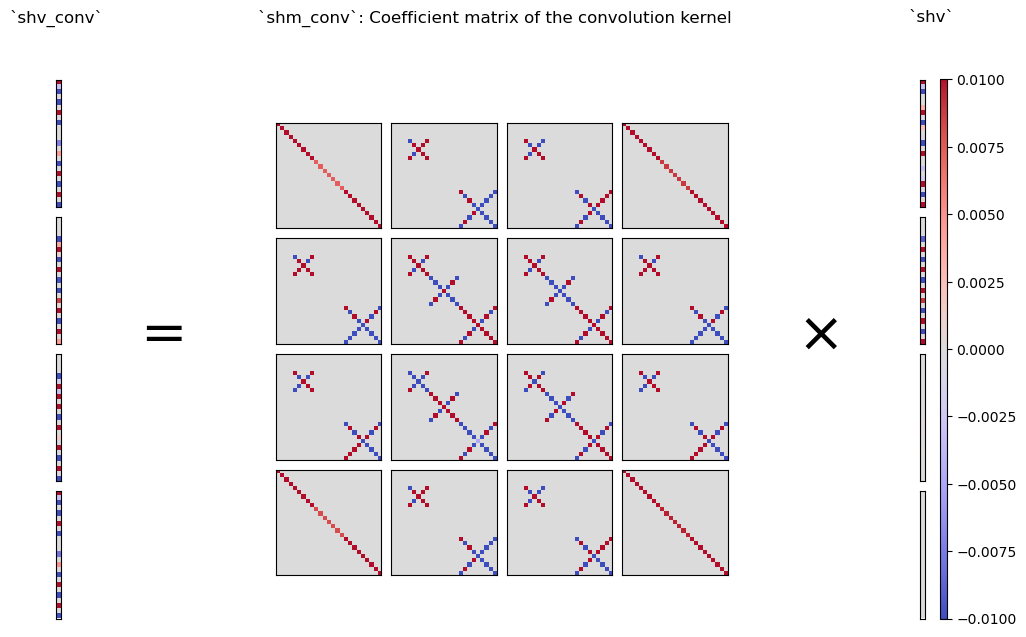

In [23]:
shConv1: psh.SHConv = stkF_shConv_list[0] # Check for the `k1` kernel for the same reason as 6.2
shm_conv: psh.SHMat = shConv1.to_SHMat()

shv_conv = shConv1 @ shv
assert shv_conv.allclose(shm_conv @ shv) # Equivalent representation!

# ---------- Visualize as matrix plots ----------
level_show = 5
cfg = dict(level_show=level_show, norm=mcolors.Normalize(-0.01, 0.01))
subfigs = plt.figure(figsize=(10,7)).subfigures(1, 5, width_ratios=[1.5, 1, 7, 1, 1.5])
shv_conv.matshow(0, **cfg, title="`shv_conv`", colorbar=False, long=True, fig=subfigs[0])
plot_text_only(subfigs[1], "$=$")
shm_conv.matshow(**cfg, title="`shm_conv`: Coefficient matrix of the convolution kernel", colorbar=False, fig=subfigs[2])
plot_text_only(subfigs[3], r"$\times$")
shv.matshow(0, **cfg, title="`shv`", long=True, fig=subfigs[4]);

While spin 0-to-0 submatrices are purely diagonal, which implies elementwise product in SH coefficients, other submatrices contain antidiagonal elements, which imply *nearly-elementwise product* in PSH coefficients, as described in our paper. For example, the computation of spin 2-to-2 part is:
$$\tag{simplified from M-69b}
{\tilde {\mathrm f}}_{lm\mathbf p}' = \sqrt\frac{4\pi}{2l+1} \left[ {\tilde{\mathrm k}}_{l,\mathrm{iso}} {\tilde{\mathrm f}}_{lm\mathbf p} + \left(-1\right)^m {\tilde{\mathrm k}}_{l,\mathrm{conj}} {\tilde{\mathrm f}}_{l,-m\mathbf p}^* \right]
$$

In [24]:
l, m = psh.level2lms(shv.level, "UNI", unstack=True)
idx_negm = psh.lms2idx(np.stack([l, -m], axis=-1), "UNI")

coeff_comp = psh.vec2comp(shv.coeff[..., 1:3]) # p=1 and 2, i.e., PSH coefficients for spin-2 Stokes vector
res = np.zeros_like(shv.coeff[..., 1:3])

res += psh.comp2vec(shConv1.coeff_v2va()[..., l] * coeff_comp) # \tilde k_{l,iso} \tilde f_{lm\mathbf p}

coeff_comp = psh.vec2comp(shv.coeff[..., idx_negm, 1:3])
phase = (-1) ** (m % 2)
res += psh.comp2vec(phase * shConv1.coeff_v2vb()[..., l] * coeff_comp.conj()) # (-1)^m \tilde k_{l,conj} \tilde f_{l,-m\mathbf p}^*

res *= np.sqrt((4*np.pi)/(2*l+1))[:, None]

# ---------- Validate ----------
shConv_spin22 = shConv1.copy()
shConv_spin22.s2v[:] = 0 # Check spin 2-to-2 convolution only
shv_conv_spin22 = shConv_spin22 @ shv
assert np.allclose(res, shv_conv_spin22.coeff[..., 1:3])
print("Identical result!")

Identical result!


### Compare results of convolutions on angular and PSH (frequency) domains

RFBOutputContext()

CanvasBackend(css_height='600px', css_width='600px')
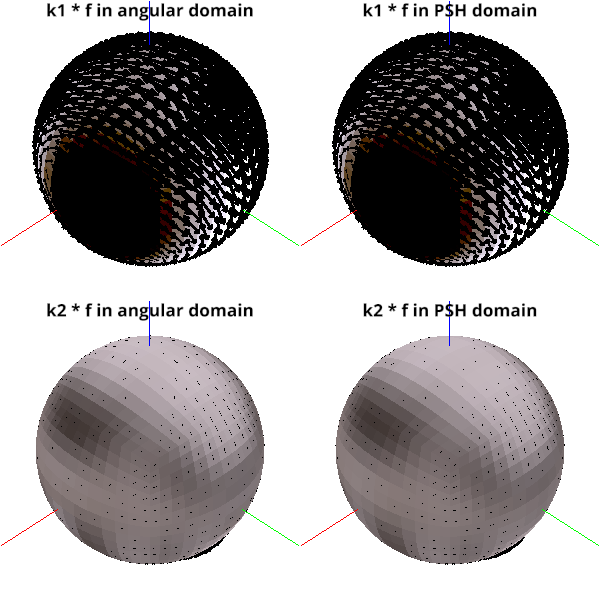

In [25]:
cfg = dict(arrow_scale=0.05, arrow_gamma=1/2.2)
with psh.visualize_layout(2, 2, figsize=(600, 600)):
    stkF_conv1.visualize(**cfg, title="k1 * f in angular domain")
    stkF_PSHconv1.visualize(**cfg, title="k1 * f in PSH domain")

    stkF_conv2.visualize(**cfg, title="k2 * f in angular domain")
    stkF_PSHconv2.visualize(**cfg, title="k2 * f in PSH domain")